In [1]:
%matplotlib inline

from IPython.display import clear_output
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_test_rand, plot_mask

from pathlib import Path
from dataset import *
from tqdm import tqdm

from CDP_test_real import test

cuda


In [2]:
x_train, x_test = load_CELEBA(200)

n_test  = 1000
x_test = x_test[:n_test]
n_batch = 1
n_steps = 50

using Gray image
Loaded CELEBA gray dataset: x_train(200, 200, 200), x_valid(1000, 200, 200)


In [3]:
dataset = 'celeba'
n_masks = 4
alpha = 4/n_masks
mask_path_learned = f'masks/{dataset}_learned_{n_masks}.npy'
mask_path_random = f'masks/{dataset}_random_{n_masks}.npy'
mask1 = np.load(mask_path_learned)
mask2 = np.load(mask_path_random)

from time import time
t0 = time()
x_rec1,mse_list_1,psnr1 = test(mask1,alpha,x_test,n_test,n_batch,n_steps)
t1 = time()
x_rec2,mse_list_2,psnr2 = test(mask2,alpha,x_test,n_test,n_batch,n_steps)
t2 = time()

print(f"time {t1-t0:.2f}")
print(f"{np.mean(psnr1):.2f}")
print(f"time {t2-t1:.2f}")
print(f"{np.mean(psnr2):.2f}")

100%|██████████| 1000/1000 [00:48<00:00, 20.60it/s]


time 48.71
78.98
time 51.04
21.67


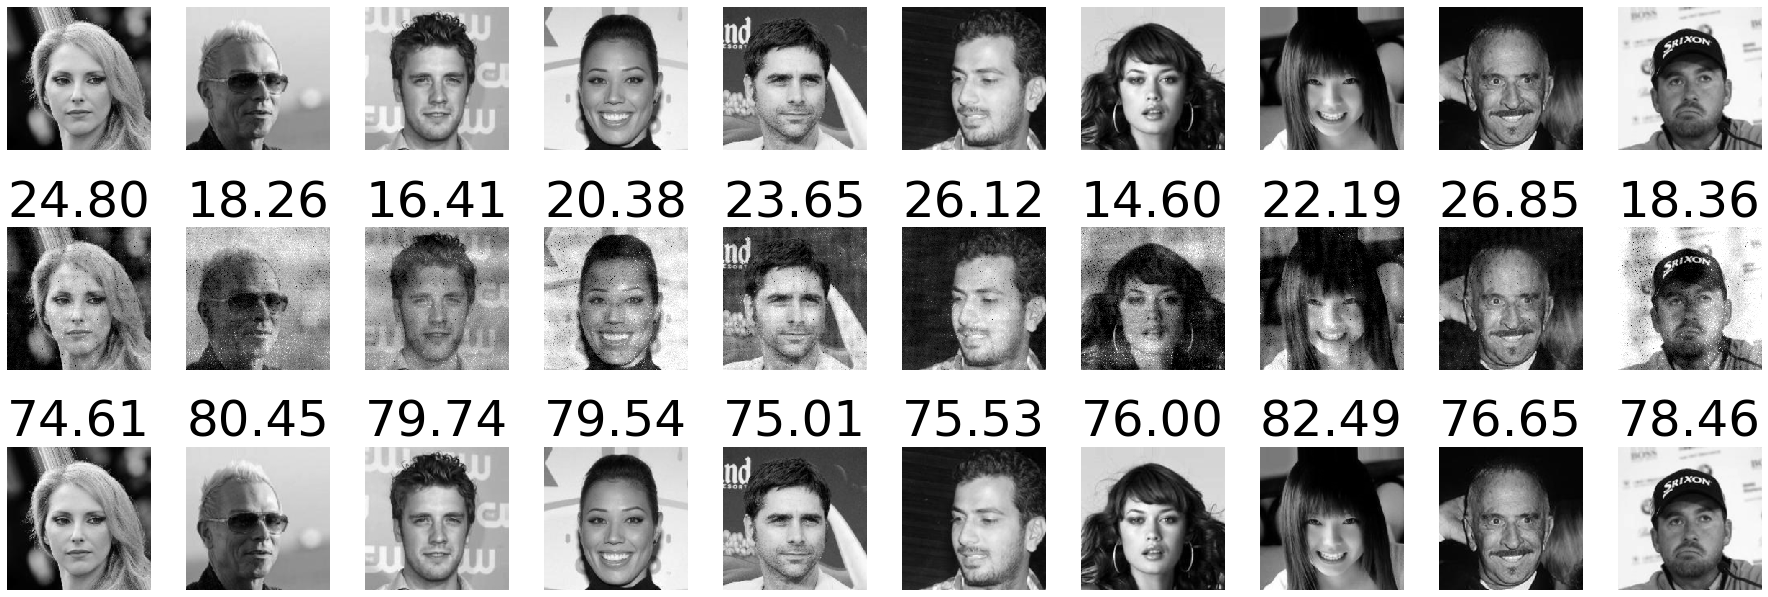

In [4]:
x_test = np.squeeze(x_test)
x_rec1 = np.squeeze(x_rec1)
x_rec2 = np.squeeze(x_rec2)
nc = 1

plot_list = list(range(10))

n = len(plot_list)
# display GT    
fig, ax = plt.subplots(3, n,figsize=(n*2+5, 9))
plt.gray()
text_size = 50
for c in range(n):
    idx = plot_list[c]
    ax[0,c].imshow(np.squeeze(x_test[idx]))
    ax[1,c].imshow(np.squeeze(x_rec2[idx]))
    ax[1,c].set_title(f'{psnr2[idx]:.2f}',fontsize=text_size)
    ax[2,c].imshow(np.squeeze(x_rec1[idx]))
    ax[2,c].set_title(f'{psnr1[idx]:.2f}',fontsize=text_size)
[axi.set_axis_off() for axi in ax.ravel()]

plt.tight_layout()
# plt.savefig('../fig/fig_raw/celeba_rec_v2.pdf')
plt.show()

[]

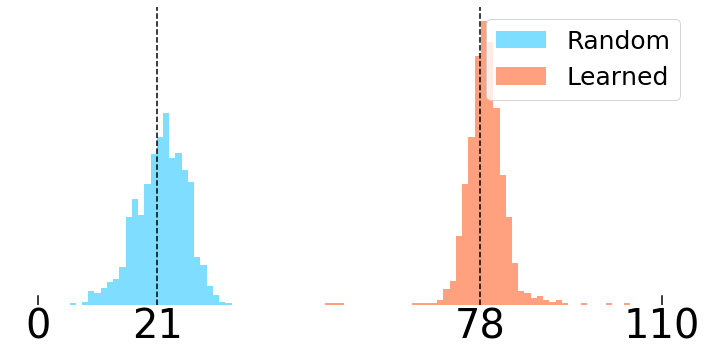

In [5]:
text_font = 'normal'
text_size = 40

plt.figure(figsize= (10,5))

bins1 = int(max(psnr1)-min(psnr1))
bins2 = int(max(psnr2)-min(psnr2))
# plt.hist(psnr2, bins = bins2, label = 'random', alpha = 0.8)
# plt.hist(psnr1, bins = bins1, label = 'learned', alpha = 0.8)
range_max = 110
plt.hist(psnr2,bins=100, range=(0,range_max), label = 'Random', color='deepskyblue', alpha = 0.5)
plt.hist(psnr1,bins=100, range=(0,range_max), label = 'Learned', color='orangered', alpha = 0.5)
plt.legend(fontsize=25,loc='upper right')

plt.yticks([])
plt.axis('off')
xposition = [0, int(np.mean(psnr2)), int(np.mean(psnr1)), range_max]
h_offset = -10
plt.axvline(x = xposition[0], color='k', linestyle='-', ymax=0.03)
plt.axvline(x = xposition[-1], color='k', linestyle='-', ymax=0.03)
plt.axvline(x = xposition[1], color='k', linestyle='--', ymax=1)
plt.axvline(x = xposition[2], color='k', linestyle='--', ymax=1)
plt.text(xposition[0], h_offset, f"{xposition[0]}", va='center_baseline', ha='center',fontsize=text_size)
plt.text(xposition[-1], h_offset, f"{xposition[-1]}", va='center_baseline', ha='center',fontsize=text_size)
plt.text(xposition[1], h_offset, f"{xposition[1]}", va='center_baseline', ha='center',fontsize=text_size)
plt.text(xposition[2], h_offset, f"{xposition[2]}", va='center_baseline', ha='center',fontsize=text_size)
# plt.text(0, h_offset, f"{xc:.0f}", va='center_baseline', ha='center',fontsize=text_size)

plt.tight_layout()
# plt.savefig('../fig/fig_raw/celeba_hist_v2.pdf')
plt.plot()